# Import data

In [2]:
#done to import record linkage
!pip install recordlinkage

Import libraries:

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import recordlinkage
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

In [4]:
url = "https://raw.githubusercontent.com/Alexhath/FIFA_dataset_data-information-quality-project/main/Dataset/fifa.csv"
FIFA = pd.read_csv(url)
FIFA

/tmp/ipython-input-2308711278.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  FIFA = pd.read_csv(url)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


# Data Exploration

For this first part we try to analyze everything that might be wrong with our dataset. This is just a preliminary analysis since, the main one will be done later in the data profiling part.

In [12]:
#number of rows and columns
FIFA.shape

(18979, 77)

In [13]:
#number of cells
CELLS = FIFA.shape[0]*FIFA.shape[1]
CELLS

1461383

In [14]:
#names of the columns
FIFA.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [15]:
#data types
FIFA.dtypes

,0
ID,int64
Name,object
LongName,object
photoUrl,object
playerUrl,object
...,...
PAS,int64
DRI,int64
DEF,int64
PHY,int64


In [16]:
#display numeric columns
NUM = list(FIFA.select_dtypes(include=['int64', 'float64']).columns)
print(len(NUM))
NUM

54


['ID',
 'Age',
 '↓OVA',
 'POT',
 'BOV',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [17]:
#display categorical columns
CAT = list(FIFA.select_dtypes(include=['object']).columns)
print(len(CAT))
CAT

23


['Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'Hits']

In [18]:
#we "relax" the maximum rows colab can display
pd.set_option('display.max_columns', 77)

#we take a random player and look for anything "supicious"
FIFA.sample()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
1861,201389,C. Biraghi,Cristiano Biraghi,https://cdn.sofifa.com/players/201/389/21_60.png,http://sofifa.com/player/201389/cristiano-bira...,Italy,27,75,75,\n\n\n\nFiorentina,2018 ~ 2022,"LM, LB",185cm,78kg,Left,75,LM,"Jul 12, 2018",NaN,€6M,€44K,€11.9M,325,80,58,65,76,46,354,75,68,60,76,75,372,74,76,71,79,72,362,79,69,76,66,72,350,74,75,68,69,64,70,218,75,73,70,49,12,6,14,10,7,2030,432,3 ★,3★,Medium,Medium,1 ★,75,65,74,75,73,70,20


In [19]:
#we return back to the default option
pd.reset_option('display.max_rows')

We'll do a check to see if all the short names in the column 'Name' correspond to the ones in the column 'LongName', if that is true we could simply remove the column 'Name'.

In [20]:
def check_single_token_match(name, long_name):

    #we remove the dots and convert the characters to lower ones
    name_tokens = name.replace('.', '').lower().split()
    long_name_tokens = long_name.replace('.', '').lower().split()

    #we use any() to see if any token in name_tokens is contained into long_name_tokens
    return any(token in long_name_tokens for token in name_tokens)

FIFA['Token_Match'] = FIFA.apply(
    lambda row: check_single_token_match(row['Name'], row['LongName']),
    axis=1
)

df_display = FIFA[['Name', 'LongName', 'Token_Match']]
print(df_display)

                    Name                      LongName  Token_Match
0               L. Messi                  Lionel Messi         True
1      Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro         True
2               J. Oblak                     Jan Oblak         True
3           K. De Bruyne               Kevin De Bruyne         True
4              Neymar Jr    Neymar da Silva Santos Jr.         True
...                  ...                           ...          ...
18974             Xia Ao                        Ao Xia         True
18975           B. Hough                     Ben Hough         True
18976        R. McKinley                Ronan McKinley         True
18977       Wang Zhen'ao                  Zhen'ao Wang         True
18978          Zhou Xiao                     Xiao Zhou         True

[18979 rows x 3 columns]


In [21]:
#we print the number of players that don't have the 'Name' part into the 'LongName' one
false_count = FIFA['Token_Match'].value_counts()[False]

print(f"Number of False values in the column 'Token_Match': {false_count}")

Number of False values in the column 'Token_Match': 261


In [22]:
#we create a boolean mask: a Series with True only where 'Token_Match' is False
mask_false = (FIFA['Token_Match'] == False)

#we use the mask to select and display only those rows
false_rows = FIFA[mask_false]


print(false_rows[['Name', 'LongName']])

             Name                           LongName
12       Casemiro  Carlos Henrique Venancio Casimiro
35        Fabinho             Fábio Henrique Tavares
62          Rodri         Rodrigo Hernández Cascante
74     Marquinhos                 Marcos Aoás Corrêa
84           Koke                 Jorge Resurrección
...           ...                                ...
15270      Capita              Osvaldo Pedro Capemba
15412       Kachi             Onyekachi Hope Ugwuadu
15598      Nenass               Erikson Spinola Lima
16190        Relu         José María Relucio Gallego
16431    Bruninho       Bruno Miguel Gonçalves Lopes

[261 rows x 2 columns]


In [23]:
#dropping the column Token Match since it's not valuable for the data set
FIFA = FIFA.drop(columns=['Token_Match'])

After this analysis we found out that the column 'Name' is essential, so it can't be dropped. We decided not to drop the 'LongName' one because some game features require it.


# Data Profiling (Dirty dataset)

Import everything to use YDATA-PROFILING LIBRARY:

In [24]:
#import sys
#!{sys.executable} -m pip install -U ydata-profiling[notebook]
#!pip install jupyter-contrib-nbextensions
#!jupyter nbextension enable --py widgetsnbextension

Import libraries:

In [25]:
#from ydata_profiling import ProfileReport
#import json

Generate the profile report of the dirty dataset

In [26]:
#PROFILE = ProfileReport(FIFA, title="Profiling Report")
#PROFILE

In [27]:
#generate the html file of the report
#PROFILE.to_file("FIFA_REPORT.")

# Data quality assesment


**DUPLICATION**

In [28]:
DUPLICATES= FIFA.duplicated()
DUPLICATES


,0
0,False
1,False
2,False
3,False
4,False
...,...
18974,False
18975,False
18976,False
18977,False


In [29]:
#print duplicates if they exists
print(DUPLICATES.any())

False


In [30]:
FIFA[DUPLICATES]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits


This shows that there are no duplicates in our dataset

**COMPLETENESS**

In [31]:
#first we convert the missing values, if present in a different form, to a standardize value
#here we define the list of missing value representations
missing_values = ['Na', 'NaN', 'na', 'n/a', 'N/A', '--', '---', '?', 'MISSING']

#convert these strings to the Missing Value sentile pd.NA
FIFA_standardize_NaN = FIFA.replace(missing_values, pd.NA)

#we "relax" the maximum rows colab can display
pd.set_option('display.max_rows', 77)

#check for missing values using the standard .isna()
print(FIFA_standardize_NaN.isna().sum())

#we return back to the default option
pd.reset_option('display.max_rows')

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    0
POT                     0
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  0
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       17966
Value                   0
Wage                    0
Release Clause          0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                 0
Skill                   0
Dribbling               0
Curve                   0
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                 0
Reactions   

As we saw in the data profiling part, even with the standardization of the null values, the only columns having null values are: 'Loan Date End' and 'Hits'

In [32]:
#total number of not null values
NOT_NULL = FIFA.count().sum()
NOT_NULL

np.int64(1440822)

We evaluate the completeness for the entire dataset

In [33]:
#CELLS is the total number of cells in the ds calculated in the data exploration part
COMPLETENESS = NOT_NULL/CELLS
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
COMPLETENESS

'98.6%'

Now we evaluate the completeness for the two columns we mentioned before, even if it is been already done in the y-data profile report

*LOAN DATE END COLUMN*

In [34]:
#total number of not null values in the Loan Date End column
NOT_NULL_LDE = FIFA['Loan Date End'].count().sum()
NOT_NULL_LDE

np.int64(1013)

In [35]:
#total number of cells in the Loan Date Column
CELLS_LDE = len(FIFA['Loan Date End'])
CELLS_LDE

18979

In [36]:
COMPLETENESS_LDE = NOT_NULL_LDE/CELLS_LDE
COMPLETENESS_LDE = '{0:.1f}%'.format(COMPLETENESS_LDE*100)
COMPLETENESS_LDE

'5.3%'

*HITS COLUMN*

In [37]:
#total number of not null values in the Loan Date End column
NOT_NULL_HITS = FIFA['Hits'].count().sum()
NOT_NULL_HITS

np.int64(16384)

In [38]:
#total number of cells in the Loan Date Column
CELLS_HITS = len(FIFA['Hits'])
CELLS_HITS

18979

In [39]:
COMPLETENESS_HITS = NOT_NULL_HITS/CELLS_HITS
COMPLETENESS_HITS = '{0:.1f}%'.format(COMPLETENESS_HITS*100)
COMPLETENESS_HITS

'86.3%'

# Data transformation / standardization

From the three steps above we found out that the names of some colums such as OVA, POT, W/F etc. need to be expanded, in order for non technical people to be able to understand what is their meaning. We also think that the 'Name' column should be renamed to make people understand it's purpose, which is to use a shorter name during in game display.

Since we'll modify DRI to 'Dribbling', we'll have to modify the name of the already named 'Dribbling' column into 'Dribbling Ability'. The same is done with the column DEF which will be renamed 'Defence' and not 'Defending'.

In [5]:
#column renaming
FIFA = FIFA.rename(columns={"↓OVA":"↓Overall", "POT":"Potential", "BOV":"Base Overall", "Name": "Display Name", "LongName": "Long Name", "W/F":"Weak Foot", "SM":"Skill Moves", "IR":"International Reputation", "GK":"Goalkeeper", "FK Accuracy":"Freekick Accuracy", "A/W":"Attacking Work Rate", "D/W":"Defending Work Rate", "PAC":"Pace", "SHO":"Shooting", "PAS":"Passing", "DRI":"Dribbling", "DEF":"Defence", "PHY":"Physicality", "Dribbling":"Dribbling Ability"})

In [6]:
#display all the columns to see if everything worked
COL = list(FIFA.columns)
COL

['ID',
 'Display Name',
 'Long Name',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓Overall',
 'Potential',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'Base Overall',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling Ability',
 'Curve',
 'Freekick Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'Weak Foot',
 'Skill Moves',
 'Attacking Work Rate',
 'Def

Now we make sure, the players are sorted from the highest overall to the lowest

In [7]:
#sorting the players,from the highest overall to the lowest
FIFA = FIFA.sort_values('↓Overall', ascending = False)
FIFA

,ID,Display Name,Long Name,photoUrl,playerUrl,Nationality,Age,↓Overall,Potential,Club,...,Attacking Work Rate,Defending Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defence,Physicality,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,\n\n\n\nFC Bayern München,...,High,Medium,4 ★,78,91,78,85,43,82,248
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,62,22,39,42,45,55,NaN
18969,257936,Song Yue,Yue Song,https://cdn.sofifa.com/players/257/936/21_60.png,http://sofifa.com/player/257936/yue-song/210006/,China PR,28,47,47,\n\n\n\nTianjin TEDA FC,...,Low,Low,1 ★,65,37,49,46,40,59,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18967,255626,Zhong Jiyu,Jiyu Zhong,https://cdn.sofifa.com/players/255/626/21_60.png,http://sofifa.com/player/255626/jiyu-zhong/210...,China PR,23,47,55,\n\n\n\nShijiazhuang Ever Bright F.C.,...,Medium,Low,1 ★,63,37,48,44,39,46,NaN


Now we start to transform and standardize all the columns and data. This is done to improve the performance and accuracy of possibles machine learning models and to ensure data consistency and interoperability.

We'll start by removing the leading spaces (\n\n\n\n) from the clubs name.

In [8]:
#showing the leading spaces in the clubs name
FIFA['Club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nNapoli',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nChelsea',
       '\n\n\n\nLazio', '\n\n\n\nArsenal', '\n\n\n\nManchester United',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nAtalanta',
       '\n\n\n\nReal Sociedad', '\n\n\n\nCagliari',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig',
       '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nSL Benfica', '\n\n\n\nEverton', '\n\n\n\nFiorentina',
       '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nAjax',
       '\n\n\n\nSevilla FC', '\n\n\n\nAS Monaco', '\n\n\n\nTorino',
       '\n\n\n\nReal Betis', '\n\n\n\nBayer 04 Leverkusen',
       '\n\n\n\nLeva

In [9]:
#removing the leading spaces
FIFA['Club'] = FIFA['Club'].str.strip()
FIFA['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'FC Bayern München', 'Atlético Madrid', 'Manchester City',
       'Liverpool', 'Real Madrid', 'Napoli', 'Tottenham Hotspur', 'Inter',
       'Chelsea', 'Lazio', 'Arsenal', 'Manchester United',
       'Borussia Dortmund', 'Leicester City', 'Borussia Mönchengladbach',
       'Atalanta', 'Real Sociedad', 'Cagliari', 'Villarreal CF',
       'RB Leipzig', 'Olympique Lyonnais', 'Milan', 'SL Benfica',
       'Everton', 'Fiorentina', 'FC Porto', 'RC Celta',
       'Wolverhampton Wanderers', 'Ajax', 'Sevilla FC', 'AS Monaco',
       'Torino', 'Real Betis', 'Bayer 04 Leverkusen', 'Levante UD',
       'Crystal Palace', 'Athletic Club de Bilbao', 'Eintracht Frankfurt',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'Roma',
       'Al Shabab', 'Grêmio', 'Inter Miami', 'Beijing Sinobo Guoan FC',
       'Newcastle United', 'Olympique de Marseille', 'Los Angeles FC',
       'VfL Wolfsburg', 'Shanghai SIPG FC', 'Medipol Başakşehi

Then we remove the star in the 'Weak Foot', 'Skill Moves' and 'International reputation' columns to convert the values into pure integers.

In [10]:
def remove_star (val):
  #this line is added because if you run the function a second time
  #wihout this line it would crash, since kg which is a string can't be an integer
  if isinstance(val, int):
      return val
  #we remove the ★ sign
  val = val.replace('★','')
  return int(val)

In [11]:
#we apply the function to the columns
FIFA['Weak Foot'] = FIFA['Weak Foot'].apply(remove_star)
FIFA['Skill Moves'] = FIFA['Skill Moves'].apply(remove_star)
FIFA['International Reputation'] = FIFA['International Reputation'].apply(remove_star)

In [12]:
FIFA = FIFA.rename(columns={"Weak Foot":"Weak Foot (★)", "Skill Moves":"Skill Moves (★)", "International Reputation":"International Reputation (★)"})

After that we continue with the 'Contract' and 'Loan Date End' columns that share the same domain. They need to be standardize and probably can be merged.

In [13]:
FIFA['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2017 ~ 2022', '2014 ~ 2023',
       '2015 ~ 2023', '2014 ~ 2022', '2018 ~ 2024', '2017 ~ 2023',
       '2016 ~ 2023', '2018 ~ 2023', '2009 ~ 2022', '2011 ~ 2023',
       '2005 ~ 2021', '2011 ~ 2021', '2013 ~ 2023', '2019 ~ 2024',
       '2017 ~ 2024', '2010 ~ 2024', '2015 ~ 2022', '2012 ~ 2021',
       '2012 ~ 2022', '2016 ~ 2025', '2019 ~ 2023', '2008 ~ 2023',
       '2015 ~ 2021', '2020 ~ 2022', '2020 ~ 2025', '2017 ~ 2025',
       '2015 ~ 2024', '2013 ~ 2022', '2019 ~ 2022', '2008 ~ 2022',
       '2012 ~ 2023', '2012 ~ 2024', '2011 ~ 2022', '2016 ~ 2021',
       '2020 ~ 2024', '2013 ~ 2024', '2020 ~ 2023', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2017 ~ 2021', '2014 ~ 2024',
       '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021', '2013 ~ 2026',
       '2016 ~ 2024', '2009 ~ 2024', '2007 ~ 2022',
       'Jun 30, 2021 On Loan', '2018 ~ 2021', '2018 ~ 2025',
       '2019 ~ 2025', '2019 ~ 2021', '2009 ~ 2021', 'Free', '2010 ~ 2023',
       '

In [14]:
FIFA['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [15]:
def extract_contract_info(contract):
    # 1. Handle Free agents (Input: "Free")
    if 'Free' in contract:
        start_date = np.nan
        end_date = np.nan
        player_status = 'Free Agent'

    # 2. Handle Loan players (Input: "Jun 30, 2021 On Loan")
    elif 'On Loan' in contract:
        # Remove the text to get just the date: "Jun 30, 2021"
        date_part = contract.replace(' On Loan', '')

        # The year is the last 4 characters
        start_date = int(date_part[-4:])
        end_date = np.nan
        player_status = 'On Loan'

    # 3. Handle standard contracts (Input: "2018 ~ 2022")
    else:
        start, end = contract.split(' ~ ')
        start_date = int(start)
        end_date = int(end)
        player_status = 'Permanent' #permanent means under contract

    return start_date, end_date , player_status

In [16]:
# we create three new columns to contain the essentials data
new_cols = ['Contract Start', 'Contract End', 'Player Status']
new_data = FIFA['Contract'].apply(lambda x: extract_contract_info(x))

#populate the new columns in the DataFrame
FIFA['Contract Start'] = new_data.apply(lambda x: x[0])
FIFA['Contract End'] = new_data.apply(lambda x: x[1])
FIFA['Player Status'] = new_data.apply(lambda x: x[2])

# Convert columns to nullable integers
FIFA['Contract Start'] = FIFA['Contract Start'].astype('Int64')
FIFA['Contract End'] = FIFA['Contract End'].astype('Int64')

# Display the result to verify
FIFA.sample(3)[['Contract Start','Contract End', 'Player Status']]

,Contract Start,Contract End,Player Status
6306,2019,2024,Permanent
5850,2016,2021,Permanent
2600,2019,2020,Permanent


There is still a problem for On Loan players since they don't have an *end date* in their 'Contract End' column. To solve this we'll take the value in the column 'Loan Date End' and substitute it into the 'Contract End' new column. We decided that even if in the 'Loan Date End' we had a date, we standardized it to be the same as the 'Contract' column, where we had only the year of termination.

In [17]:
def extract_loan_year(loan_end):
    #check if the value is missing (<NA>)
    if pd.isna(loan_end):
        return np.nan
    else:
        #if it exists (e.g., "Jun 30, 2021"), slice the last 4 characters
        year = str(loan_end)[-4:]
        return int(year)

In [18]:
#extract years from the 'Loan Date End' column
loan_years = FIFA['Loan Date End'].apply(extract_loan_year)

#fill the missing values in 'Contract End' using the ending year of the loan
FIFA['Contract End'] = FIFA['Contract End'].fillna(loan_years)

#verify that 'Contract End' corresponds to the 'Loan Date End'
FIFA[FIFA['Player Status'] == 'On Loan'][['Contract End', 'Loan Date End']]

,Contract End,Loan Date End
205,2021,"Jun 30, 2021"
248,2021,"Jun 30, 2021"
254,2021,"Jun 30, 2021"
302,2021,"Jun 30, 2021"
332,2021,"Jun 30, 2021"
...,...,...
18472,2021,"Aug 31, 2021"
18680,2020,"Dec 31, 2020"
18571,2021,"Jun 30, 2021"
18600,2020,"Dec 31, 2020"


In [19]:
#check for the free agents
free_agents = FIFA[FIFA['Player Status'] == 'Free Agent']

#display the <NA> value for the Contract Start and Contract End columns
free_agents[['Contract Start', 'Contract End', 'Player Status']]

,Contract Start,Contract End,Player Status
289,<NA>,<NA>,Free Agent
292,<NA>,<NA>,Free Agent
376,<NA>,<NA>,Free Agent
377,<NA>,<NA>,Free Agent
375,<NA>,<NA>,Free Agent
...,...,...,...
17220,<NA>,<NA>,Free Agent
17343,<NA>,<NA>,Free Agent
17659,<NA>,<NA>,Free Agent
17661,<NA>,<NA>,Free Agent


In [20]:
#check for the number of free agents
len(free_agents)

237

These values aren't that many and are just missing since they doesn't exist. In the next part, we'll take care of them. The last thing remained to do is to drop the columns.

In [21]:
FIFA = FIFA.drop(columns=['Loan Date End', 'Contract'])

After that we take care of the 'Joined' column

In [22]:
FIFA['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'Mar 6, 2018',
       'Feb 28, 2015', 'Sep 22, 2018'], dtype=object)

In [23]:
#display the 'Joined' column
FIFA['Joined']

,Joined
0,"Jul 1, 2004"
1,"Jul 10, 2018"
4,"Aug 3, 2017"
5,"Jul 1, 2014"
2,"Jul 16, 2014"
...,...
18978,"Jul 29, 2019"
18969,"Aug 1, 2020"
18975,"Aug 1, 2020"
18967,"Feb 9, 2018"


In [24]:
FIFA['Joined'] = pd.to_datetime(FIFA['Joined'], format = 'mixed')

In [25]:
#display the 'Joined' column to show the differences
FIFA['Joined']

,Joined
0,2004-07-01
1,2018-07-10
4,2017-08-03
5,2014-07-01
2,2014-07-16
...,...
18978,2019-07-29
18969,2020-08-01
18975,2020-08-01
18967,2018-02-09


Then from the previous exploration we saw that the height is stored with inconsistent unity measures.
To perform a good standardization we:

1. Change the values that are in feet to cm;
2. Remove the unity measure "cm" in the cells. This is done to facilitate an eventual analysis of the column;
3. Change the name of the column to 'Height (cm)';



In [26]:
#showing the unique values of the column height
FIFA['Height'].unique()

array(['170cm', '187cm', '175cm', '184cm', '188cm', '181cm', '191cm',
       '178cm', '193cm', '185cm', '173cm', '199cm', '177cm', '168cm',
       '176cm', '183cm', '189cm', '195cm', '180cm', '172cm', '182cm',
       '179cm', '186cm', '194cm', '167cm', '192cm', '165cm', '174cm',
       '169cm', '163cm', '190cm', '196cm', '171cm', '197cm', '200cm',
       '166cm', '6\'3"', '6\'0"', '6\'5"', '5\'4"', '164cm', '6\'2"',
       '198cm', '5\'11"', '6\'4"', '6\'1"', '5\'6"', '5\'7"', '5\'10"',
       '5\'9"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

To convert foot into cm we have to multiply the feet by 30.48 cm and the inches by 2.54 cm.

In [27]:
def converting_cm(height):
  #this line is added because if you run the function a second time
  #wihout this line it would crash, since cm which is a string can't be in an integer
  if isinstance(height, int):
      return height

  if 'cm' in height:
    return int(height.strip('cm')) #we remove the "cm" unity measure
  else:
    feet,inches = height.split("'")
    inches = inches.replace('"','')
    height = int(feet)*30.48 + int(inches)*2.54
    return round(height)

#uppdating the height column
FIFA['Height'] = FIFA['Height'].apply(converting_cm)


In [28]:
#we display the unique values (all integers)
FIFA['Height'].unique()

array([170, 187, 175, 184, 188, 181, 191, 178, 193, 185, 173, 199, 177,
       168, 176, 183, 189, 195, 180, 172, 182, 179, 186, 194, 167, 192,
       165, 174, 169, 163, 190, 196, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

In [29]:
#we rename the column
FIFA = FIFA.rename(columns={"Height":"Height (cm)"})
FIFA['Height (cm)']

,Height (cm)
0,170
1,187
4,175
5,184
2,188
...,...
18978,188
18969,185
18975,175
18967,170


Now we do the same thing but with the 'Weight' column

In [30]:
FIFA['Weight'].unique()

array(['72kg', '83kg', '68kg', '80kg', '87kg', '70kg', '85kg', '91kg',
       '71kg', '73kg', '69kg', '92kg', '81kg', '82kg', '84kg', '96kg',
       '89kg', '74kg', '86kg', '75kg', '76kg', '90kg', '66kg', '64kg',
       '78kg', '94kg', '79kg', '67kg', '60kg', '65kg', '61kg', '59kg',
       '97kg', '88kg', '62kg', '77kg', '93kg', '95kg', '63kg', '100kg',
       '58kg', '203lbs', '183lbs', '181lbs', '139lbs', '179lbs', '172lbs',
       '196lbs', '176lbs', '185lbs', '130lbs', '190lbs', '174lbs',
       '148lbs', '165lbs', '170lbs', '157lbs', '159lbs', '168lbs',
       '154lbs', '161lbs', '146lbs', '192lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

To convert lbs into kg we have to multiply by 0.454

In [31]:
def converting_kg(weight):
  #this line is added because if you run the function a second time
  #wihout this line it would crash, since kg which is a string can't be in an integer
  if isinstance(weight, int):
      return weight

  if 'kg' in weight:
    return int(weight.strip('kg')) #we remove the "kg" unity measure
  else:
    libres = weight.replace('lbs','')
    weight = int(libres) * 0.454
    return round(weight)

#uppdating the weight column
FIFA['Weight'] = FIFA['Weight'].apply(converting_kg)

In [32]:
#we display the unique values (all integers)
FIFA['Weight'].unique()

array([ 72,  83,  68,  80,  87,  70,  85,  91,  71,  73,  69,  92,  81,
        82,  84,  96,  89,  74,  86,  75,  76,  90,  66,  64,  78,  94,
        79,  67,  60,  65,  61,  59,  97,  88,  62,  77,  93,  95,  63,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

In [33]:
#we rename the column
FIFA = FIFA.rename(columns={"Weight":"Weight (kg)"})
FIFA['Weight (kg)']

,Weight (kg)
0,72
1,83
4,68
5,80
2,87
...,...
18978,75
18969,79
18975,65
18967,62


After this, the last data to standardize are in the 'Value', 'Release Clause' and 'Wage' columns. To be consistent we'll set the first two in millions of € and the last one in thousands of €.

In [34]:
FIFA['Value'].unique()

array(['€103.5M', '€63M', '€132M', '€111M', '€120M', '€129M', '€110M',
       '€102M', '€120.5M', '€185.5M', '€113M', '€83.5M', '€17.5M',
       '€33.5M', '€90.5M', '€82M', '€76.5M', '€89.5M', '€92M', '€109M',
       '€10M', '€78M', '€103M', '€114.5M', '€87.5M', '€26M', '€21M',
       '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€105.5M', '€92.5M',
       '€81.5M', '€95M', '€124M', '€88.5M', '€85M', '€114M', '€79.5M',
       '€61.5M', '€65.5M', '€46.5M', '€32.5M', '€43.5M', '€36M', '€57M',
       '€54M', '€32M', '€49.5M', '€72.5M', '€77.5M', '€52.5M', '€66M',
       '€67M', '€62M', '€70M', '€57.5M', '€34.5M', '€58M', '€74.5M',
       '€44M', '€44.5M', '€51.5M', '€81M', '€37M', '€66.5M', '€14.5M',
       '€47.5M', '€54.5M', '€46M', '€71.5M', '€93.5M', '€121M', '€86.5M',
       '€99M', '€63.5M', '€55M', '€60.5M', '€43M', '€45.5M', '€34M',
       '€26.5M', '€40.5M', '€42.5M', '€35.5M', '€45M', '€40M', '€11M',
       '€61M', '€29M', '€58.5M', '€55.5M', '€42M', '€13.5M', '€29.5M',
       '€

In [35]:
FIFA['Release Clause'].unique()

array(['€138.4M', '€75.9M', '€166.5M', ..., '€101K', '€64K', '€35K'],
      dtype=object)

In [36]:
def converting_ml (value):
  #this line is added because if you run the function a second time
  #wihout this line it would crash, since kg which is a string can't be in an integer
  if isinstance(value, float):
      return value
  #we remove the € sign
  value = value.replace('€','')

  #if there is an 'M' we remove it, otherwise we remove 'K' and convert it into millions
  if 'M' in value:
    return float(value.strip('M'))
  else:
    return float(value.strip('K'))/1000

In [37]:
#uppdating the value column
FIFA['Value'] = FIFA['Value'].apply(converting_ml)
FIFA['Release Clause'] = FIFA['Release Clause'].apply(converting_ml)

We display the values of the two columns changed

In [38]:
FIFA['Value'].unique()

array([1.035e+02, 6.300e+01, 1.320e+02, 1.110e+02, 1.200e+02, 1.290e+02,
       1.100e+02, 1.020e+02, 1.205e+02, 1.855e+02, 1.130e+02, 8.350e+01,
       1.750e+01, 3.350e+01, 9.050e+01, 8.200e+01, 7.650e+01, 8.950e+01,
       9.200e+01, 1.090e+02, 1.000e+01, 7.800e+01, 1.030e+02, 1.145e+02,
       8.750e+01, 2.600e+01, 2.100e+01, 5.600e+01, 6.750e+01, 5.300e+01,
       3.650e+01, 5.100e+01, 1.055e+02, 9.250e+01, 8.150e+01, 9.500e+01,
       1.240e+02, 8.850e+01, 8.500e+01, 1.140e+02, 7.950e+01, 6.150e+01,
       6.550e+01, 4.650e+01, 3.250e+01, 4.350e+01, 3.600e+01, 5.700e+01,
       5.400e+01, 3.200e+01, 4.950e+01, 7.250e+01, 7.750e+01, 5.250e+01,
       6.600e+01, 6.700e+01, 6.200e+01, 7.000e+01, 5.750e+01, 3.450e+01,
       5.800e+01, 7.450e+01, 4.400e+01, 4.450e+01, 5.150e+01, 8.100e+01,
       3.700e+01, 6.650e+01, 1.450e+01, 4.750e+01, 5.450e+01, 4.600e+01,
       7.150e+01, 9.350e+01, 1.210e+02, 8.650e+01, 9.900e+01, 6.350e+01,
       5.500e+01, 6.050e+01, 4.300e+01, 4.550e+01, 

In [39]:
FIFA['Release Clause'].unique()

array([1.384e+02, 7.590e+01, 1.665e+02, ..., 1.010e-01, 6.400e-02,
       3.500e-02])

Now we standardize the 'Wage' column

In [40]:
FIFA['Wage'].unique()

array(['€560K', '€220K', '€270K', '€240K', '€125K', '€370K', '€260K',
       '€160K', '€250K', '€210K', '€350K', '€130K', '€300K', '€310K',
       '€140K', '€195K', '€190K', '€100K', '€145K', '€110K', '€95K',
       '€170K', '€105K', '€115K', '€200K', '€155K', '€230K', '€82K',
       '€165K', '€290K', '€55K', '€58K', '€150K', '€135K', '€56K',
       '€120K', '€59K', '€65K', '€90K', '€34K', '€81K', '€84K', '€86K',
       '€47K', '€75K', '€20K', '€68K', '€85K', '€25K', '€46K', '€74K',
       '€78K', '€27K', '€79K', '€175K', '€43K', '€71K', '€18K', '€54K',
       '€83K', '€45K', '€38K', '€69K', '€31K', '€64K', '€41K', '€39K',
       '€35K', '€21K', '€49K', '€30K', '€14K', '€23K', '€33K', '€17K',
       '€87K', '€50K', '€28K', '€53K', '€51K', '€48K', '€60K', '€40K',
       '€76K', '€72K', '€89K', '€32K', '€70K', '€36K', '€26K', '€37K',
       '€24K', '€16K', '€29K', '€12K', '€0', '€13K', '€19K', '€1K',
       '€66K', '€80K', '€2K', '€63K', '€42K', '€52K', '€73K', '€62K',
       '€900', '€5

In [41]:
def converting_k (value):
  #this line is added because if you run the function a second time
  #wihout this line it would crash, since kg which is a string can't be in an integer
  if isinstance(value, float):
      return value
  #we remove the € sign
  value = value.replace('€','')

  #if there is an 'M' we remove it, otherwise we remove 'K' and convert it into millions
  if 'K' in value:
    return float(value.strip('K'))*1000
  else:
    return float(value)

In [42]:
#updating the wage column
FIFA['Wage'] = FIFA['Wage'].apply(converting_k)

In [43]:
FIFA['Wage'].unique()

array([5.60e+05, 2.20e+05, 2.70e+05, 2.40e+05, 1.25e+05, 3.70e+05,
       2.60e+05, 1.60e+05, 2.50e+05, 2.10e+05, 3.50e+05, 1.30e+05,
       3.00e+05, 3.10e+05, 1.40e+05, 1.95e+05, 1.90e+05, 1.00e+05,
       1.45e+05, 1.10e+05, 9.50e+04, 1.70e+05, 1.05e+05, 1.15e+05,
       2.00e+05, 1.55e+05, 2.30e+05, 8.20e+04, 1.65e+05, 2.90e+05,
       5.50e+04, 5.80e+04, 1.50e+05, 1.35e+05, 5.60e+04, 1.20e+05,
       5.90e+04, 6.50e+04, 9.00e+04, 3.40e+04, 8.10e+04, 8.40e+04,
       8.60e+04, 4.70e+04, 7.50e+04, 2.00e+04, 6.80e+04, 8.50e+04,
       2.50e+04, 4.60e+04, 7.40e+04, 7.80e+04, 2.70e+04, 7.90e+04,
       1.75e+05, 4.30e+04, 7.10e+04, 1.80e+04, 5.40e+04, 8.30e+04,
       4.50e+04, 3.80e+04, 6.90e+04, 3.10e+04, 6.40e+04, 4.10e+04,
       3.90e+04, 3.50e+04, 2.10e+04, 4.90e+04, 3.00e+04, 1.40e+04,
       2.30e+04, 3.30e+04, 1.70e+04, 8.70e+04, 5.00e+04, 2.80e+04,
       5.30e+04, 5.10e+04, 4.80e+04, 6.00e+04, 4.00e+04, 7.60e+04,
       7.20e+04, 8.90e+04, 3.20e+04, 7.00e+04, 3.60e+04, 2.60e

Finally we rename the columns, to let the user know in which unity measure they are written

In [44]:
FIFA = FIFA.rename(columns={"Value":"Value (Mil of €)", "Wage":"Wage (€)", "Release Clause":"Release Clause (Mil of €)"})

The last thing we need to do is to standardize the column 'Hit' which contains NaN values and must be standardize to perform the substitution of the null values

In [45]:
FIFA['Hits'].unique()

array(['771', '562', '595', '248', '150', '207', '130', '120', '246',
       '1.6K', '189', '321', '216', '118', '212', '154', '175', '96',
       '173', '103', '332', '408', '86', '202', '339', '205', '161', '65',
       '336', '117', '119', '209', '84', '187', '165', '203', '1.5K',
       '177', '206', '242', '1.1K', '198', '459', '433', '396', '124',
       '126', '101', '182', '45', '194', '377', '99', '313', '538', '145',
       '211', '265', '215', '299', '309', '245', '75', '278', '137',
       '112', '159', '337', '70', '197', '176', '148', '688', '63', '116',
       '403', '144', '113', '224', '89', '61', '168', '123', '71', '414',
       '266', '593', '3.2K', '374', '264', '402', '247', '320', '171',
       '2.3K', '1.7K', '440', '196', '60', '97', '85', '169', '256',
       '132', '239', '121', '657', '87', '259', '200', '253', '46', '122',
       '48', '527', '199', '255', '214', '166', '32', '109', '642', '155',
       '142', '50', '77', '40', '107', '193', '179', '34', '6

In [46]:
FIFA['Hits'] = FIFA['Hits'].apply(converting_k).astype('Int64')

In [47]:
FIFA['Hits'].unique()

<IntegerArray>
[ 771,  562,  595,  248,  150,  207,  130,  120,  246, 1600,
 ...
  485,  826,  192,  941,  477,  644,  303,  417, 6000, <NA>]
Length: 440, dtype: Int64

Here we display a sample of the columns we have now in our dataset

In [48]:
#we "relax" the maximum rows colab can display
pd.set_option('display.max_columns', 79)

#we take a random player and look for anything "supicious"
FIFA.sample(5)

,ID,Display Name,Long Name,photoUrl,playerUrl,Nationality,Age,↓Overall,Potential,Club,Positions,Height (cm),Weight (kg),Preferred Foot,Base Overall,Best Position,Joined,Value (Mil of €),Wage (€),Release Clause (Mil of €),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling Ability,Curve,Freekick Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot (★),Skill Moves (★),Attacking Work Rate,Defending Work Rate,International Reputation (★),Pace,Shooting,Passing,Dribbling,Defence,Physicality,Hits,Contract Start,Contract End,Player Status
2989,245977,K. Despodov,Kiril Despodov,https://cdn.sofifa.com/players/245/977/21_60.png,http://sofifa.com/player/245977/kiril-despodov...,Bulgaria,23,73,79,No Club,"RM, ST, LM",178,69,Right,74,CAM,2019-01-31,0.000,0.0,0.000,331,68,75,48,69,71,349,73,70,72,62,72,384,85,85,74,66,74,358,81,79,68,57,73,274,58,23,71,70,52,72,84,25,31,28,50,10,12,10,5,13,1830,390,4,3,High,Medium,1,85,74,68,73,29,61,44,<NA>,<NA>,Free Agent
8454,252675,J. Dawa Tchakonte,Joyskim Dawa Tchakonte,https://cdn.sofifa.com/players/252/675/21_60.png,http://sofifa.com/player/252675/joyskim-dawa-t...,Cameroon,24,66,71,No Club,CB,194,95,Right,68,CB,2019-08-13,0.000,0.0,0.000,210,41,23,68,57,21,197,41,24,23,54,55,237,53,58,41,54,31,309,65,58,66,95,25,227,71,64,28,36,28,62,190,63,66,61,59,13,12,13,15,6,1429,324,2,2,Low,Medium,1,56,32,46,45,64,81,8,<NA>,<NA>,Free Agent
17323,22391,R. Cretaro,Raffaele Cretaro,https://cdn.sofifa.com/players/022/391/21_60.png,http://sofifa.com/player/22391/raffaele-cretar...,Republic of Ireland,38,56,56,Finn Harps,"CF, CAM, ST",165,64,Right,56,CF,2018-12-14,0.050,500.0,0.047,280,55,58,56,55,56,281,59,55,58,51,58,301,55,34,68,57,87,260,55,85,32,34,54,252,55,23,56,55,63,56,91,33,29,29,66,10,14,13,13,16,1531,288,4,3,Medium,Medium,1,43,57,55,61,32,40,<NA>,2018,2020,Permanent
6886,223122,C. Osmanpaşa,Caner Osmanpaşa,https://cdn.sofifa.com/players/223/122/21_60.png,http://sofifa.com/player/223122/caner-osmanpas...,Turkey,32,68,68,Sivasspor,CB,182,77,Right,68,CB,2019-07-08,0.775,7000.0,1.200,233,58,25,57,66,27,239,58,32,27,61,61,257,49,52,56,52,48,304,48,76,70,81,29,234,54,74,28,31,47,54,212,68,74,70,52,14,10,9,13,6,1531,337,3,2,Medium,Medium,1,51,32,53,58,70,73,1,2019,2021,Permanent
7200,253911,D. Saggiomo,Daniel Saggiomo,https://cdn.sofifa.com/players/253/911/21_60.png,http://sofifa.com/player/253911/daniel-saggiom...,Venezuela,21,68,77,Argentinos Juniors,"RW, CF, LW",165,55,Right,69,CAM,2020-08-07,2.700,5000.0,2.400,303,70,64,54,66,49,319,66,62,61,60,70,341,69,72,68,59,73,315,62,51,72,59,71,256,39,39,70,68,40,48,127,44,44,39,43,8,7,10,7,11,1704,369,3,2,High,Low,1,71,63,66,67,44,58,3,2020,2023,Permanent


# Error detection and correction of the missing values

First we cope with missing values. The columns having them are:

*   'Contract start' and 'Contract End': they have null values for free agent players, that don't have any contract since they aren't signed by any club. To replace them we decided to put a sentinel values such as -1 to signal that the player doesn't have a contract. We didn't drop the rows because these are still players that can be used in the game;
*   'Hits': this column represent the number of hits a player received after being searched on the "career database". We'll replace the null values with the value 0 since it means the player has never been searched;





In [49]:
FIFA['Hits'] = FIFA['Hits'].fillna(0)

In [50]:
FIFA['Contract Start'] = FIFA['Contract Start'].fillna(-1)
FIFA['Contract End'] = FIFA['Contract End'].fillna(-1)

In [51]:
#we make sure the null values are 0
FIFA.isnull().sum().sum()

np.int64(0)

# Error detection and correction of outliers

In the data profiling part we saw how some of the stats of the players have a disparity in the numerical domain. For example the 'Attacking' column, have a maximum of 437 and a minumum of 42, while other columns such as 'Finishing' have a maximum of 95 and a minimum of 3. We assume that some columns such as the 'Attacking' one are the sum of other columns related to them. So we look for which columns compose them.

In [52]:
#we create an array of the columns we want to sum
att_cols = ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys']

#we put the sum inside a column
FIFA['Att_Sum'] = FIFA[att_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Attacking_Sum_Check'] = FIFA['Attacking'] == FIFA['Att_Sum']

#~ symbol is the negation
# since sum counts the number of 'True' inside the column, we negate the value
att_mismatched_count = (~FIFA['Attacking_Sum_Check']).sum()

print(f"Number of rows where 'Attacking' != sum of components: {att_mismatched_count}")

Number of rows where 'Attacking' != sum of components: 0


In [53]:
#we create an array of the columns we want to sum
skill_cols = ['Dribbling Ability', 'Curve', 'Freekick Accuracy', 'Long Passing', 'Ball Control']

#we put the sum inside a column
FIFA['Skill_Sum'] = FIFA[skill_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Skill_Sum_Check'] = FIFA['Skill'] == FIFA['Skill_Sum']

#we count the number of mismatches
skill_mismatched_count = (~FIFA['Skill_Sum_Check']).sum()

print(f"Number of rows where 'Skill' != sum of components: {skill_mismatched_count}")

Number of rows where 'Skill' != sum of components: 0


In [54]:
#we create an array of the columns we want to sum
mov_cols = ['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']

#we put the sum inside a column
FIFA['Mov_Sum'] = FIFA[mov_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Movement_Sum_Check'] = FIFA['Movement'] == FIFA['Mov_Sum']

#we count the number of mismatches
mov_mismatched_count = (~FIFA['Movement_Sum_Check']).sum()

print(f"Number of rows where 'Movement' != sum of components: {mov_mismatched_count}")

Number of rows where 'Movement' != sum of components: 0


In [55]:
#we create an array of the columns we want to sum
pow_cols = ['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']

#we put the sum inside a column
FIFA['Pow_Sum'] = FIFA[pow_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Power_Sum_Check'] = FIFA['Power'] == FIFA['Pow_Sum']

#we count the number of mismatches
pow_mismatched_count = (~FIFA['Power_Sum_Check']).sum()

print(f"Number of rows where 'Power' != sum of components: {pow_mismatched_count}")

Number of rows where 'Power' != sum of components: 0


In [56]:
#we create an array of the columns we want to sum
ment_cols = ['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties']

#we put the sum inside a column
FIFA['Ment_Sum'] = FIFA[ment_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Mentality_Sum_Check'] = FIFA['Mentality'] == FIFA['Ment_Sum']

#we count the number of mismatches
ment_mismatched_count = (~FIFA['Mentality_Sum_Check']).sum()

print(f"Number of rows where 'Mentality' != sum of components: {ment_mismatched_count}")

Number of rows where 'Mentality' != sum of components: 0


In [57]:
#we create an array of the columns we want to sum
def_cols = ['Marking', 'Standing Tackle', 'Sliding Tackle']

#we put the sum inside a column
FIFA['Def_Sum'] = FIFA[def_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Defending_Sum_Check'] = FIFA['Defending'] == FIFA['Def_Sum']

#we count the number of mismatches
def_mismatched_count = (~FIFA['Defending_Sum_Check']).sum()

print(f"Number of rows where 'Defending' != sum of components: {def_mismatched_count}")

Number of rows where 'Defending' != sum of components: 0


In [58]:
#we create an array of the columns we want to sum
gk_cols = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

#we put the sum inside a column
FIFA['GK_Sum'] = FIFA[gk_cols].sum(axis=1)

#we create a column that contains 'True' if the values are the same or
# 'False' if they are not
FIFA['Goalkeeping_Sum_Check'] = FIFA['Goalkeeping'] == FIFA['GK_Sum']

#we count the number of mismatches
gk_mismatched_count = (~FIFA['Goalkeeping_Sum_Check']).sum()

print(f"Number of rows where 'Goalkeeping' != sum of components: {gk_mismatched_count}")

Number of rows where 'Goalkeeping' != sum of components: 0


After we made sure all the "abnormal" numerical columns were the sum of other columns, we remove all the useless columns created

In [59]:
FIFA = FIFA.drop(columns=['Att_Sum', 'Attacking_Sum_Check', 'Skill_Sum', 'Skill_Sum_Check', 'Mov_Sum', 'Movement_Sum_Check', 'Pow_Sum', 'Power_Sum_Check', 'Ment_Sum', 'Mentality_Sum_Check', 'Def_Sum', 'Defending_Sum_Check', 'GK_Sum', 'Goalkeeping_Sum_Check'])

As an outlier detection method we apply LOF. This algorithm scores data points based on the density of their neighbouring data points. The score assigned depends on how isolated the object is w.r.t. the sorrounding k-neighborhood. We decided to use this since it can compare all the players that are near each other, so most likely goalkeepers will be compared with one another.

In [60]:
numerical_cols = FIFA.select_dtypes(include=['int64', 'float64', 'Int64']).columns.tolist()
print(f"Identified numerical columns: {numerical_cols}")

Identified numerical columns: ['ID', 'Age', '↓Overall', 'Potential', 'Height (cm)', 'Weight (kg)', 'Base Overall', 'Value (Mil of €)', 'Wage (€)', 'Release Clause (Mil of €)', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling Ability', 'Curve', 'Freekick Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot (★)', 'Skill Moves (★)', 'International Reputation (★)', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defence', 'Physicality', 'Hits', 'Contract Start', 'Contract End']


In [61]:
#we remove the ID feature
features = [col for col in numerical_cols if col != 'ID']
numerical_fifa_df = FIFA[features]

Then, we scale the dataset with RobustScaler because it is more sensitive to changes with respect to a StandardScaler. Basically, we'd like to have that a change of 10 points in the attribute Mentality becomes just as significant as a change of 10,000 in Wage.

In [62]:
#initialize the Scaler
scaler = RobustScaler()

#fit and transform the data
data_scaled = scaler.fit_transform(numerical_fifa_df)

In [63]:
def LOF_outlier_detection(X):
    data = X
    # requires no missing value

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

    clf.fit_predict(X)

    LOF_scores = clf.negative_outlier_factor_
    # Outliers tend to have a negative score far from -1


    outliers = X[LOF_scores < -1.9]

    print("Outliers: ", data.iloc[outliers.index])
    return outliers

outliers_LOF = LOF_outlier_detection(numerical_fifa_df)

Outliers:         Age  ↓Overall  Potential  Height (cm)  Weight (kg)  Base Overall  \
0       33        93         93          170           72            93   
5       31        91         91          184           80            91   
17      32        89         89          173           70            89   
18      25        88         90          170           69            88   
67      25        85         89          188           80            86   
...    ...       ...        ...          ...          ...           ...   
15118   21        60         71          175           70            62   
15143   31        60         60          188           89            60   
16047   20        59         72          187           85            61   
15757   24        59         62          180           78            62   
17340   29        56         57          190           98            57   

       Value (Mil of €)  Wage (€)  Release Clause (Mil of €)  Attacking  \
0            

In [64]:
# Print the outliers along with the player's name
FIFA.loc[outliers_LOF.index, ['Display Name', 'Long Name']].merge(outliers_LOF, left_index=True, right_index=True)

,Display Name,Long Name,Age,↓Overall,Potential,Height (cm),Weight (kg),Base Overall,Value (Mil of €),Wage (€),Release Clause (Mil of €),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling Ability,Curve,Freekick Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot (★),Skill Moves (★),International Reputation (★),Pace,Shooting,Passing,Dribbling,Defence,Physicality,Hits,Contract Start,Contract End
0,L. Messi,Lionel Messi,33,93,93,170,72,93,103.500,560000.0,138.400,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,5,85,92,91,95,38,65,771,2004,2021
3,K. De Bruyne,Kevin De Bruyne,29,91,91,181,70,91,129.000,370000.0,161.000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,4,76,86,93,88,64,78,207,2015,2023
15,K. Benzema,Karim Benzema,32,89,89,185,81,89,83.500,350000.0,108.700,426,75,88,91,86,86,404,87,81,73,73,90,388,77,72,79,91,69,400,84,79,78,80,79,363,63,39,90,87,84,90,89,47,24,18,41,13,11,5,5,7,2111,442,4,4,4,74,85,81,86,40,76,216,2009,2022
26,E. Hazard,Eden Hazard,29,88,88,175,74,88,89.500,350000.0,118.900,388,77,82,61,85,83,427,93,83,79,81,91,448,91,86,92,86,93,361,82,56,82,63,78,353,54,41,85,86,87,90,83,34,27,22,45,11,12,6,8,8,2105,446,4,4,4,88,82,83,92,35,66,246,2019,2024
69,G. Donnarumma,Gianluigi Donnarumma,21,85,92,196,90,85,93.500,34000.0,78.900,78,12,12,12,34,8,106,28,12,14,24,28,281,46,54,64,79,38,253,57,72,34,72,18,144,30,26,14,50,24,68,50,20,14,16,418,89,81,76,83,89,1330,468,3,1,3,89,81,76,89,50,83,266,2015,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15157,G. Bazunu,Gavin Bazunu,18,60,82,189,78,60,0.700,500.0,1.100,49,11,5,11,15,7,72,8,14,12,22,16,202,29,25,54,52,42,178,42,65,16,50,5,90,16,9,8,42,15,38,39,16,12,11,294,60,59,56,59,60,924,321,2,1,1,60,59,56,60,27,59,134,2019,2024
15182,A. Traore,Amad Diallo Traore,17,60,80,174,70,64,0.675,2000.0,1.100,260,50,64,45,57,44,265,68,42,38,51,66,365,77,77,73,61,77,259,60,56,51,36,56,217,32,13,62,55,55,59,55,17,16,22,53,13,15,8,11,6,1474,317,3,2,1,77,60,53,68,19,40,253,2019,2021
16109,K. Miura,Kazuyoshi Miura,53,59,59,177,72,60,0.000,700.0,0.000,289,44,66,56,61,62,290,63,69,54,36,68,187,24,26,27,48,62,235,59,32,21,62,61,257,45,16,71,66,59,77,42,16,13,13,41,6,14,8,6,7,1341,269,4,2,1,25,63,55,60,19,47,125,2005,2021
15819,D. Maldini,Daniel Maldini,18,59,79,186,76,61,0.625,2000.0,0.878,262,52,48,48,66,48,300,60,60,60,58,62,323,67,69,65,56,66,264,60,54,47,53,50,242,46,34,54,56,52,55,114,30,44,40,65,12,12,14,13,14,1570,327,4,3,1,68,51,59,61,38,50,6000,2018,2024


The algorithm successfully flagged the most statistically extreme rows (e.g., L. Messi (highest overall) , K. Miura (53 years old)). Our manual inspection confirmed that these were valid extreme values (Superstars/Rare Demographics) rather than data entry errors, in the numerical columns. This is why we are not going to drop the outliers detected.

During the data profiling phase, we observed that certain aggregate variables, specifically Skill and Attacking, exhibited a bimodal distribution (a distribution with two distinct peaks).

Initially, the lower range of values appeared anomalous, raising concerns about potential outliers or data quality issues. However, applying domain knowledge analysis suggested that this is not an error, but rather a structural characteristic of football data: the difference in technical requirements between Goalkeepers and Outfield Players.

The following analysis aims to verify this hypothesis. We will stratify the dataset by player position to demonstrate that a peak corresponds exclusively to goalkeepers, while the other one represents outfield players.

First we use a lambda funtion and create a column to distinguish between the goakeepers and the outfield players.

In [65]:
#Create a category to distinguish between Goalkeepers and Outfield Players
#we use the 'Best Position' column
#if the position is 'GK', they are a Goalkeeper; otherwise, they are an Outfield Player.
FIFA['Player_Type'] = FIFA['Best Position'].apply(lambda x: 'Goalkeeper' if x == 'GK' else 'Outfield Player')

Then we analyze each one of the columns we looked earlier. For each column we use the Kernel-Density Estimation (KDE), that estimates the distribution probability of the column as a density function.  It’s related to the histogram of the distribution plus a data smoothing factor. The output is a smooth density estimate. This is done to show the bimodal distribution.

After that we use the two different Player_Type flags created to highlight how one distribution is made of goalkeepers and how the other one is made of outfield players.

Attacking

/tmp/ipython-input-4033108443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Attacking'], hist= True, kde = True)


<Axes: xlabel='Attacking', ylabel='Density'>

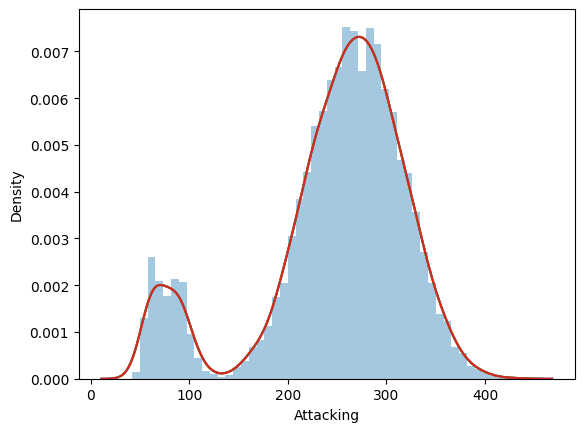

In [66]:
sns.distplot(FIFA['Attacking'], hist= True, kde = True)
sns.kdeplot(FIFA['Attacking'], cut = 1)
sns.kdeplot(FIFA['Attacking'], cut = 2)
sns.kdeplot(FIFA['Attacking'], cut = 3)

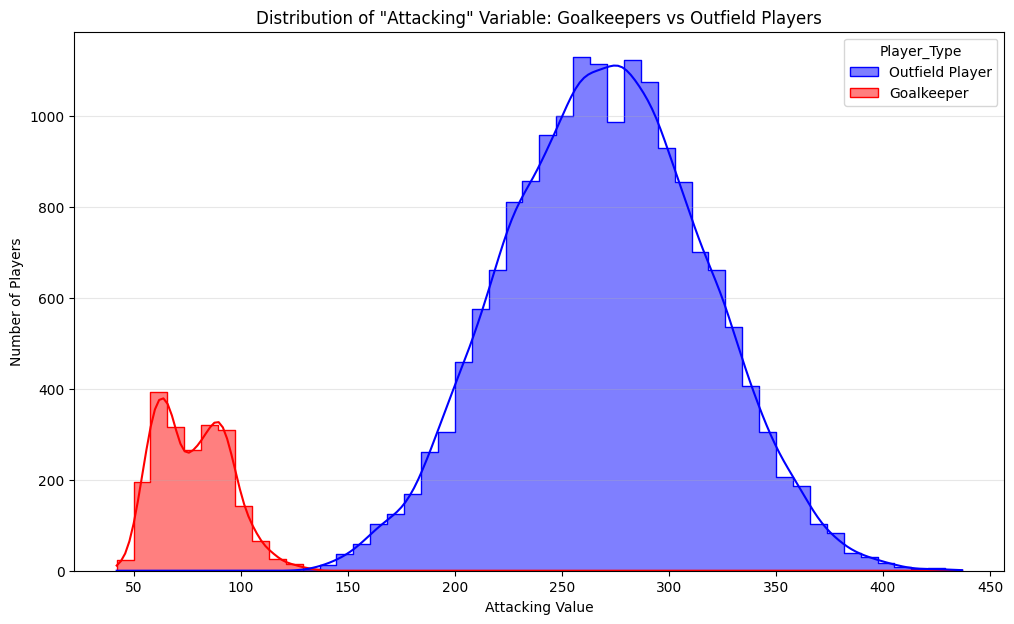

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,77.727711,16.751245,42.0,134.0
Outfield Player,16904.0,269.954567,46.081401,134.0,437.0


In [67]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

#we use Seaborn's histplot
#'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Attacking',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step"
)

plt.title('Distribution of "Attacking" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Attacking Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

#numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Attacking'].describe()[['count', 'mean', 'std', 'min', 'max']])

Movement:

/tmp/ipython-input-2330947230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Movement'], hist= True, kde = True)


<Axes: xlabel='Movement', ylabel='Density'>

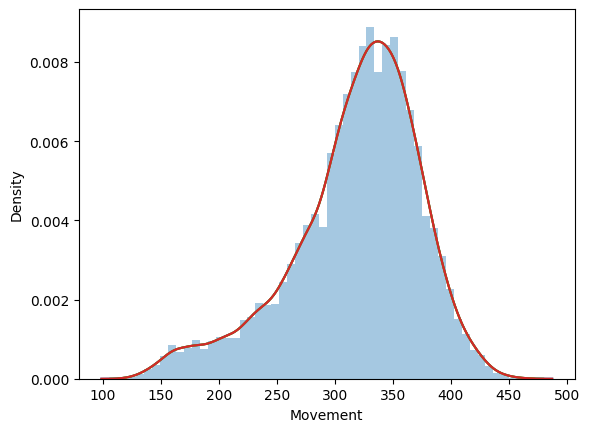

In [68]:
sns.distplot(FIFA['Movement'], hist= True, kde = True)
sns.kdeplot(FIFA['Movement'], cut = 1)
sns.kdeplot(FIFA['Movement'], cut = 2)
sns.kdeplot(FIFA['Movement'], cut = 3)

From the 'Movement' density graph it might seem that the two type of players merge...

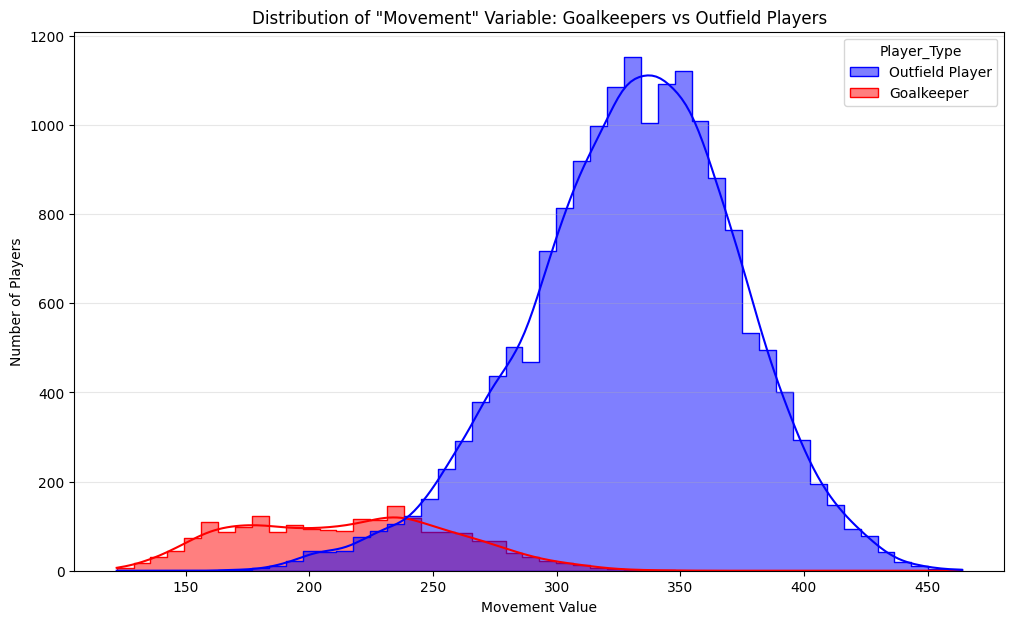

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,214.975422,42.621304,122.0,347.0
Outfield Player,16904.0,330.330632,42.754488,168.0,464.0


In [69]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Movement',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Movement" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Movement Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Movement'].describe()[['count', 'mean', 'std', 'min', 'max']])

From this graph instead we can clearly see that there is still a difference.

Power:

/tmp/ipython-input-3800864538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Power'], hist= True, kde = True)


<Axes: xlabel='Power', ylabel='Density'>

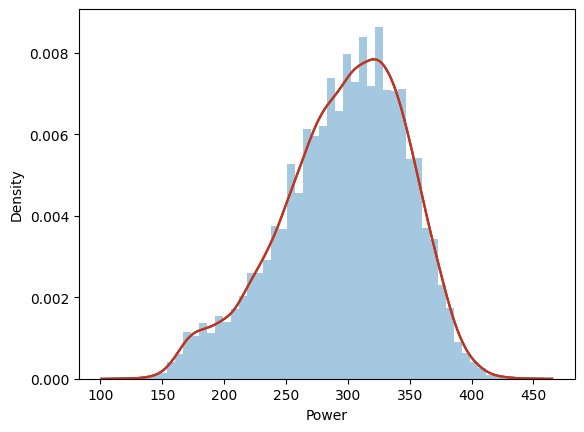

In [70]:
sns.distplot(FIFA['Power'], hist= True, kde = True)
sns.kdeplot(FIFA['Power'], cut = 1)
sns.kdeplot(FIFA['Power'], cut = 2)
sns.kdeplot(FIFA['Power'], cut = 3)

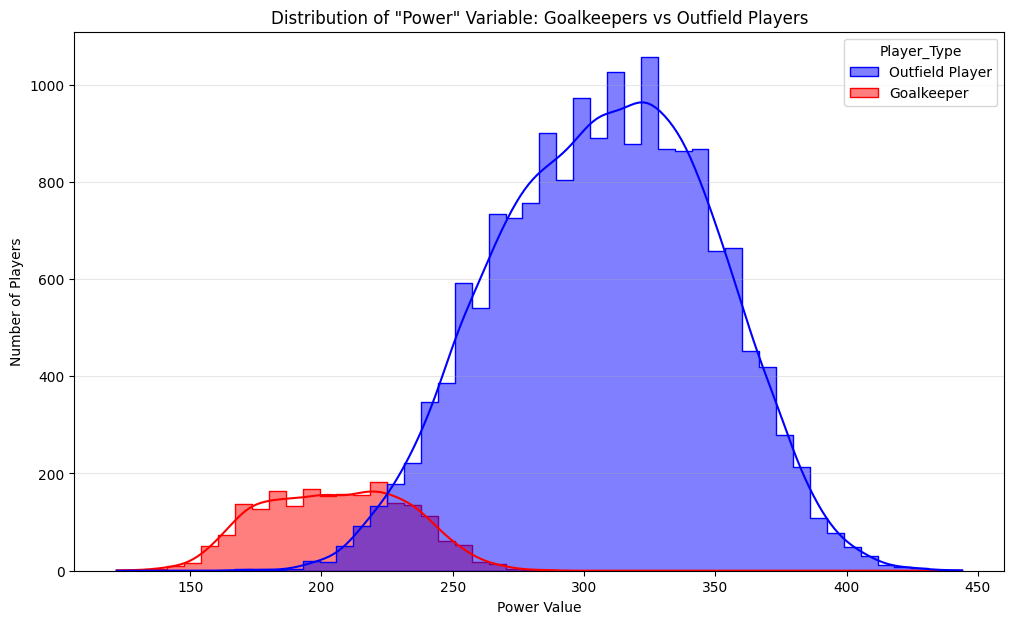

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,205.394217,27.149622,122.0,285.0
Outfield Player,16904.0,307.801526,40.652597,169.0,444.0


In [71]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Power',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Power" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Power Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Power'].describe()[['count', 'mean', 'std', 'min', 'max']])

Skill:

/tmp/ipython-input-126744127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Skill'], hist= True, kde = True)


<Axes: xlabel='Skill', ylabel='Density'>

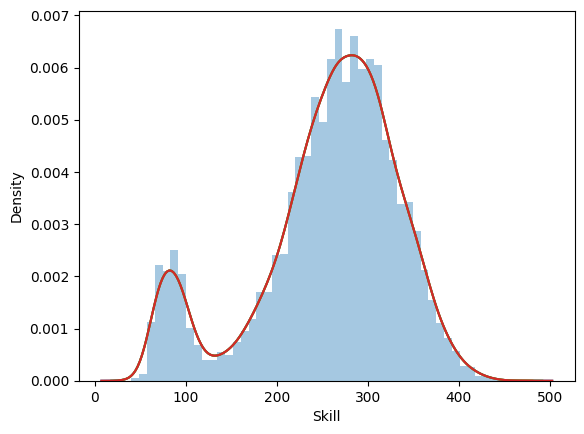

In [72]:
sns.distplot(FIFA['Skill'], hist= True, kde = True)
sns.kdeplot(FIFA['Skill'], cut = 1)
sns.kdeplot(FIFA['Skill'], cut = 2)
sns.kdeplot(FIFA['Skill'], cut = 3)

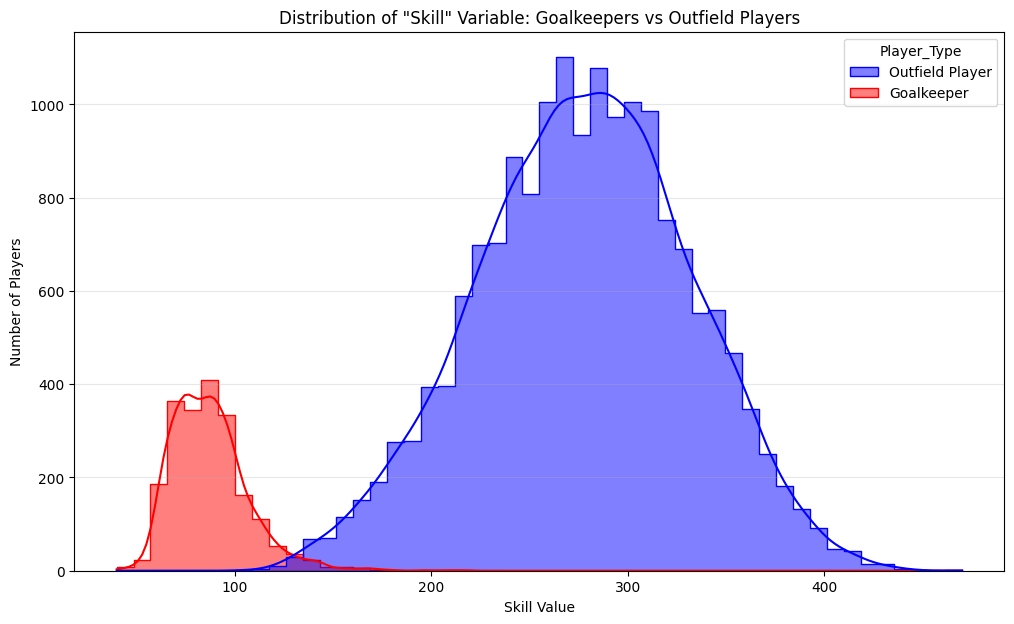

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,87.305542,19.437389,40.0,216.0
Outfield Player,16904.0,277.245622,54.353763,103.0,470.0


In [73]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Skill',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Skill" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Skill Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Skill'].describe()[['count', 'mean', 'std', 'min', 'max']])

Mentality:

/tmp/ipython-input-295797354.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Mentality'], hist= True, kde = True)


<Axes: xlabel='Mentality', ylabel='Density'>

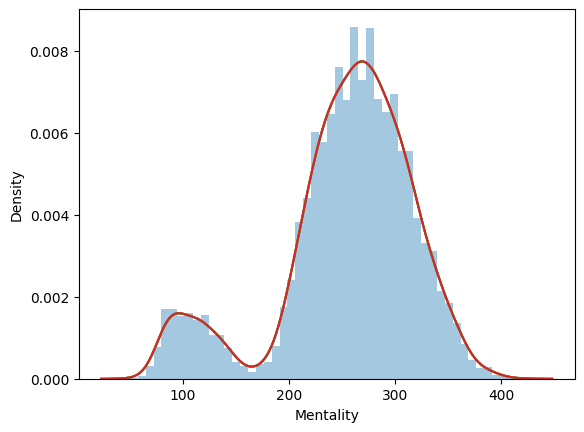

In [74]:
sns.distplot(FIFA['Mentality'], hist= True, kde = True)
sns.kdeplot(FIFA['Mentality'], cut = 1)
sns.kdeplot(FIFA['Mentality'], cut = 2)
sns.kdeplot(FIFA['Mentality'], cut = 3)

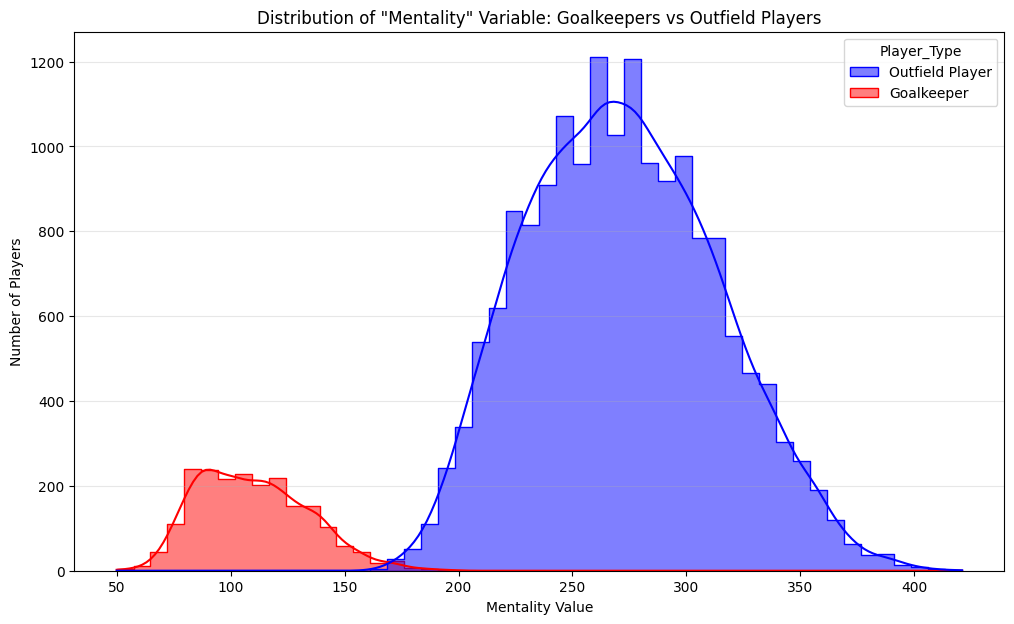

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,110.007711,24.166370,50.0,197.0
Outfield Player,16904.0,271.899610,41.803413,165.0,421.0


In [75]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Mentality',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Mentality" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Mentality Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Mentality'].describe()[['count', 'mean', 'std', 'min', 'max']])

Defending:

/tmp/ipython-input-5808858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Defending'], hist= True, kde = True)


<Axes: xlabel='Defending', ylabel='Density'>

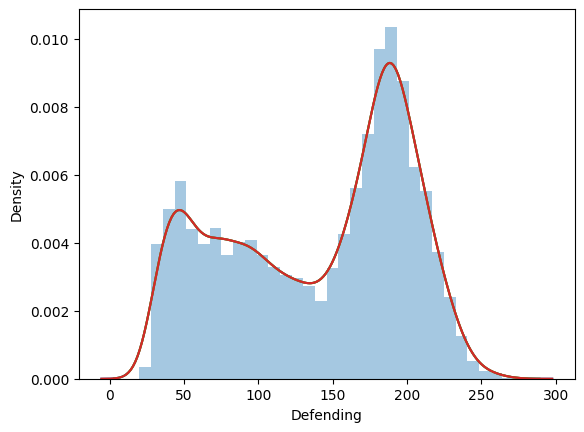

In [76]:
sns.distplot(FIFA['Defending'], hist= True, kde = True)
sns.kdeplot(FIFA['Defending'], cut = 1)
sns.kdeplot(FIFA['Defending'], cut = 2)
sns.kdeplot(FIFA['Defending'], cut = 3)

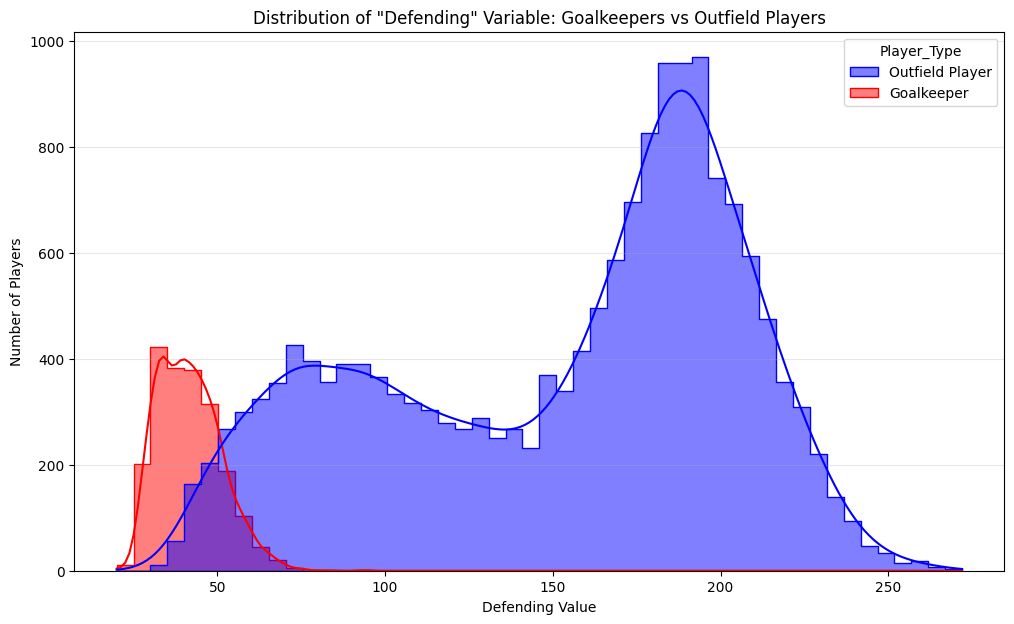

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,41.698795,9.415942,20.0,94.0
Outfield Player,16904.0,151.964801,53.550268,32.0,272.0


In [77]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Defending',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Defending" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Defending Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Defending'].describe()[['count', 'mean', 'std', 'min', 'max']])

Goalkeeping:

/tmp/ipython-input-3420897614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Goalkeeping'], hist= True, kde = True)


<Axes: xlabel='Goalkeeping', ylabel='Density'>

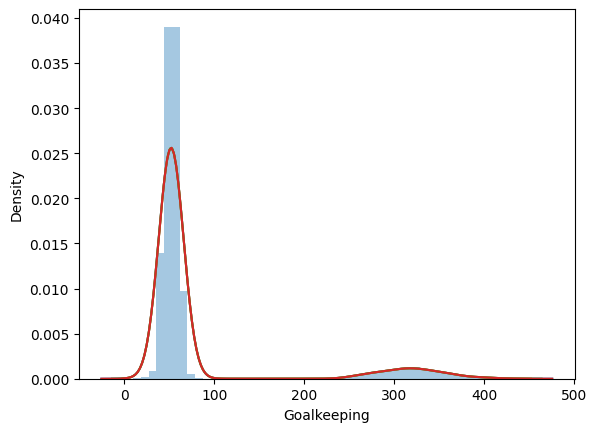

In [78]:
sns.distplot(FIFA['Goalkeeping'], hist= True, kde = True)
sns.kdeplot(FIFA['Goalkeeping'], cut = 1)
sns.kdeplot(FIFA['Goalkeeping'], cut = 2)
sns.kdeplot(FIFA['Goalkeeping'], cut = 3)

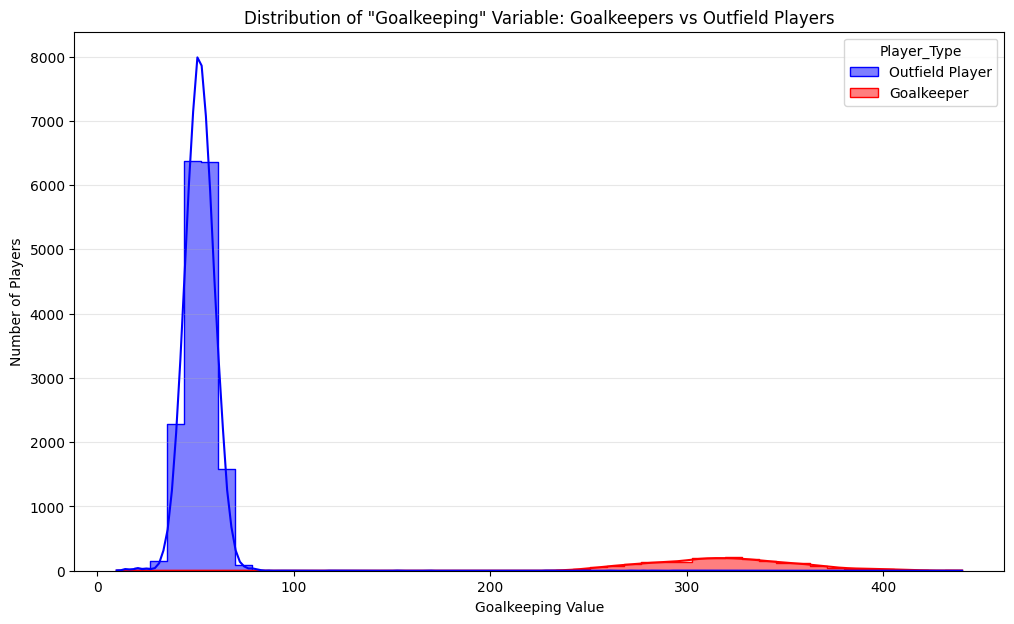

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,319.445783,36.231594,231.0,440.0
Outfield Player,16904.0,52.220599,8.911830,10.0,298.0


In [79]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Goalkeeping',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Goalkeeping" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Goalkeeping Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Goalkeeping'].describe()[['count', 'mean', 'std', 'min', 'max']])

The same thing happens also in the columns that describe an attacking or goalkeeping characteristic

Heading Accuracy:

/tmp/ipython-input-880723833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['Heading Accuracy'], hist= True, kde = True)


<Axes: xlabel='Heading Accuracy', ylabel='Density'>

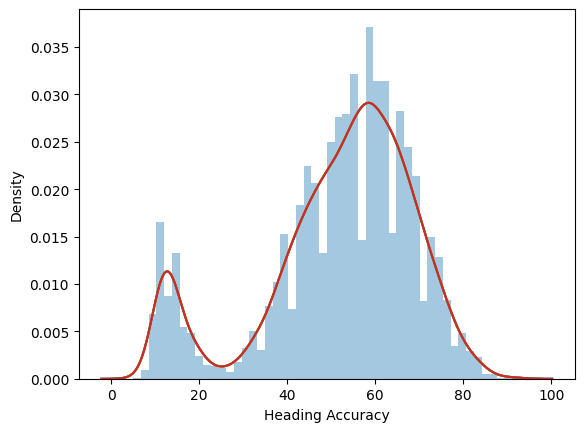

In [80]:
sns.distplot(FIFA['Heading Accuracy'], hist= True, kde = True)
sns.kdeplot(FIFA['Heading Accuracy'], cut = 1)
sns.kdeplot(FIFA['Heading Accuracy'], cut = 2)
sns.kdeplot(FIFA['Heading Accuracy'], cut = 3)

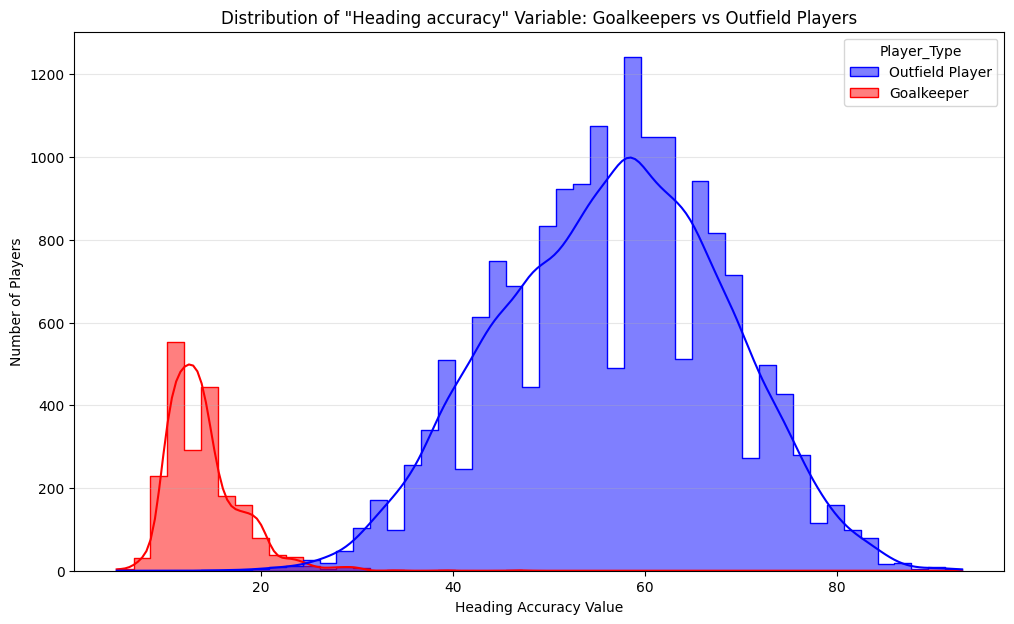

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,14.027952,3.777846,5.0,47.0
Outfield Player,16904.0,56.596841,11.658904,15.0,93.0


In [81]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='Heading Accuracy',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "Heading accuracy" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('Heading Accuracy Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['Heading Accuracy'].describe()[['count', 'mean', 'std', 'min', 'max']])

GK Reflexes:

/tmp/ipython-input-2735285370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(FIFA['GK Reflexes'], hist= True, kde = True)


<Axes: xlabel='GK Reflexes', ylabel='Density'>

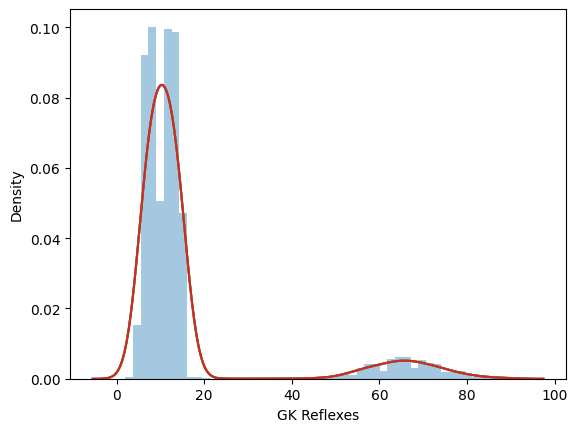

In [82]:
sns.distplot(FIFA['GK Reflexes'], hist= True, kde = True)
sns.kdeplot(FIFA['GK Reflexes'], cut = 1)
sns.kdeplot(FIFA['GK Reflexes'], cut = 2)
sns.kdeplot(FIFA['GK Reflexes'], cut = 3)

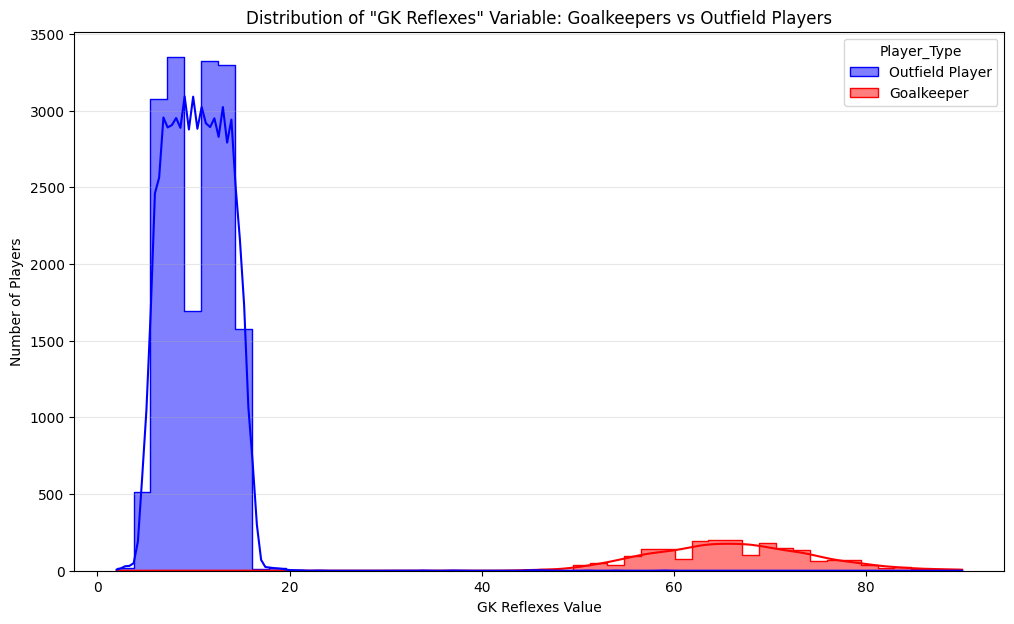

Descriptive Statistics by Group:


,count,mean,std,min,max
Player_Type,,,,,
Goalkeeper,2075.0,66.186506,8.091235,44.0,90.0
Outfield Player,16904.0,10.422918,3.142041,2.0,59.0


In [83]:
#Create the overlaid plot
plt.figure(figsize=(12, 7))

# Use Seaborn's histplot.
# The 'hue' parameter separates colors based on player type.
# 'kde=True' adds the density curve line to highlight the "parabolas".
sns.histplot(
    data=FIFA,
    x='GK Reflexes',
    hue='Player_Type',
    kde=True,
    bins=50,
    palette={'Goalkeeper': 'red', 'Outfield Player': 'blue'},
    alpha=0.5, # Transparency to see the overlap
    element="step" # Unified visual style
)

plt.title('Distribution of "GK Reflexes" Variable: Goalkeepers vs Outfield Players')
plt.xlabel('GK Reflexes Value')
plt.ylabel('Number of Players')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Numerical confirmation with descriptive statistics
print("Descriptive Statistics by Group:")
display(FIFA.groupby('Player_Type')['GK Reflexes'].describe()[['count', 'mean', 'std', 'min', 'max']])

In [84]:
FIFA = FIFA.drop(columns=['Player_Type'])

#Data Deduplication

For the data deduplication part we used recordlinkage, to see if there are really similar players in our dataset, with similar stats. That might have been inserted twice with some different errors.

In [85]:
indexer = recordlinkage.index.SortedNeighbourhood(
        on='Long Name', window=9)

candidate_links = indexer.index(FIFA)
print (len(list(candidate_links)))
candidate_links

76558


/tmp/ipython-input-3029690441.py:1: DeprecationWarning: The argument 'on' is deprecated. Use 'left_on=...' and 'right_on=None' to simulate the behaviour of 'on'.
  indexer = recordlinkage.index.SortedNeighbourhood(


MultiIndex([(   89,     8),
            (  183,   112),
            (  202,   140),
            (  175,   179),
            (  260,    40),
            (  270,   236),
            (  343,    48),
            (  377,   115),
            (  392,    44),
            (  444,   335),
            ...
            (18971,  6987),
            (18970,   274),
            (18965,  3049),
            (18972, 10806),
            (18974, 14455),
            (18978, 18917),
            (18969, 15718),
            (18975, 12694),
            (18967, 18943),
            (18966, 18977)],
           length=76558)

In [86]:
FIFA.columns

Index(['ID', 'Display Name', 'Long Name', 'photoUrl', 'playerUrl',
       'Nationality', 'Age', '↓Overall', 'Potential', 'Club', 'Positions',
       'Height (cm)', 'Weight (kg)', 'Preferred Foot', 'Base Overall',
       'Best Position', 'Joined', 'Value (Mil of €)', 'Wage (€)',
       'Release Clause (Mil of €)', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling Ability', 'Curve', 'Freekick Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot (★)',
  

We decided to compare columns such as 'Display Name' and 'Club' with the jarowinkler method. Then used the numeric method for attributes such as the height, weight and the most important stats that compose a player.

In [87]:
compare_cl = recordlinkage.Compare()

#the identifiers
compare_cl.string('Long Name', 'Long Name', method='jarowinkler', threshold=0.8, label='Name_Score')
compare_cl.exact('Age', 'Age', label='Age_Score')
compare_cl.string('Club', 'Club', method='jarowinkler', threshold=0.8, label='Club_Score')

#we use 'numeric' to allow for slight data entry errors
compare_cl.numeric('Height (cm)', 'Height (cm)', method='step', offset=2, label='Height_Score')
compare_cl.numeric('Weight (kg)', 'Weight (kg)', method='step', offset=2, label='Weight_Score')
compare_cl.numeric('Pace', 'Pace', method= 'step', offset =2, label = 'Pace_Score')
compare_cl.numeric('Shooting', 'Shooting', method= 'step', offset =2, label = 'Shooting')
compare_cl.numeric('Passing', 'Passing', method= 'step', offset =2, label = 'Passing_Score')
compare_cl.numeric('Dribbling', 'Dribbling', method= 'step', offset =2, label = 'Dribbling_Score')
compare_cl.numeric('Defence', 'Defence', method= 'step', offset =2, label = 'Defence_Score')
compare_cl.numeric('Physicality', 'Physicality', method= 'step', offset =2, label = 'Physicality_Score')


features = compare_cl.compute(candidate_links, FIFA)

#over 11 attributes we use a treshold of 8
matches = features[features.sum(axis=1) >= 8]

matches

,,Name_Score,Age_Score,Club_Score,Height_Score,Weight_Score,Pace_Score,Shooting,Passing_Score,Dribbling_Score,Defence_Score,Physicality_Score
3336,2811,1.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4605,1154,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
12429,10768,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
12836,11827,1.0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
17328,16693,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
18840,17761,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
16569,14169,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
13221,12165,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
15779,13401,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1652,1655,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [88]:
print("Matched Players:")
for i, j in matches.index:
    player1_display_name = FIFA.loc[i, 'Display Name']
    player1_long_name = FIFA.loc[i, 'Long Name']
    player2_display_name = FIFA.loc[j, 'Display Name']
    player2_long_name = FIFA.loc[j, 'Long Name']

    print(f"  Match: {player1_display_name} ({player1_long_name}) -- {player2_display_name} ({player2_long_name})")

Matched Players:
  Match: I. Diallo (Ibrahima Diallo) -- I. Mbaye (Ibrahima Mbaye)
  Match: G. Castellani (Gonzalo Castellani) -- G. Escalante (Gonzalo Escalante)
  Match: N. Butzen (Nils Butzen) -- N. Miatke (Nils Miatke)
  Match: S. Davies (Scott Davies) -- S. Fox (Scott Fox)
  Match: J. Brauti (Jonas Brauti) -- J. Dakir (Jonas Dakir)
  Match: H. Al Quraish (Hussain Al Quraish) -- H. Salem (Hussain Salem)
  Match: D. Borkowski (Dennis Borkowski) -- D. Cirkin (Dennis Cirkin)
  Match: J. Taylor (Jake Taylor) -- J. Taylor (Jake Taylor)
  Match: J. Kuzdra (Jakub Kuzdra) -- J. Kiełb (Jakub Kiełb)
  Match: R. Saponara (Riccardo Saponara) -- R. Orsolini (Riccardo Orsolini)
  Match: O. Linnér (Oscar Linnér) -- O. Jiménez (Oscar Jiménez)
  Match: S. Zwierschitz (Stephan Zwierschitz) -- S. Salger (Stephan Salger)
  Match: F. Cambeses (Facundo Cambeses) -- F. Altamirano (Facundo Altamirano)
  Match: C. Forrester (Chris Forrester) -- C. Clements (Chris Clements)
  Match: K. Piscopo (Kevin Piscop

In [89]:
for i, j in matches.index:
    display(FIFA.loc[[i, j], ['Display Name', 'Long Name', 'Club', 'Age', 'Height (cm)', 'Weight (kg)', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defence', 'Physicality']])

,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
3336,I. Diallo,Ibrahima Diallo,Southampton,21,179,68,68,48,64,70,70,69
2811,I. Mbaye,Ibrahima Mbaye,Bologna,25,188,70,68,49,64,68,72,68


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
4605,G. Castellani,Gonzalo Castellani,Unión La Calera,32,183,75,65,66,72,71,61,76
1154,G. Escalante,Gonzalo Escalante,Lazio,27,182,76,66,67,71,69,75,76


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
12429,N. Butzen,Nils Butzen,FC Hansa Rostock,27,179,76,78,52,60,66,61,71
10768,N. Miatke,Nils Miatke,FSV Zwickau,30,178,76,79,50,60,68,61,65


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
12836,S. Davies,Scott Davies,Tranmere Rovers,33,183,70,63,60,61,66,25,62
11827,S. Fox,Scott Fox,Motherwell,33,183,79,64,62,62,65,33,63


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
17328,J. Brauti,Jonas Brauti,Stabæk Fotball,21,190,76,58,56,52,57,29,57
16693,J. Dakir,Jonas Dakir,Randers FC,23,191,76,59,56,53,58,18,57


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
18840,H. Al Quraish,Hussain Al Quraish,Al Faisaly,22,181,70,57,42,46,52,43,57
17761,H. Salem,Hussain Salem,Al Faisaly,22,179,70,71,25,47,54,50,55


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
16569,D. Borkowski,Dennis Borkowski,RB Leipzig,18,184,74,61,57,42,58,24,55
14169,D. Cirkin,Dennis Cirkin,Tottenham Hotspur,18,182,72,63,39,44,60,61,56


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
13221,J. Taylor,Jake Taylor,Scunthorpe United,21,178,77,71,58,60,64,55,63
12165,J. Taylor,Jake Taylor,Exeter City,28,177,77,69,56,62,65,54,70


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
15779,J. Kuzdra,Jakub Kuzdra,Warta Poznań,22,178,71,65,42,51,54,56,62
13401,J. Kiełb,Jakub Kiełb,Warta Poznań,26,176,73,67,42,54,56,55,60


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
1652,R. Saponara,Riccardo Saponara,Fiorentina,28,184,73,65,67,75,80,41,58
1655,R. Orsolini,Riccardo Orsolini,Bologna,23,183,73,78,69,73,80,39,59


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
5312,O. Linnér,Oscar Linnér,DSC Arminia Bielefeld,23,199,82,73,67,66,70,35,72
4254,O. Jiménez,Oscar Jiménez,Club América,31,182,80,73,69,68,72,33,71


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
8430,S. Zwierschitz,Stephan Zwierschitz,FK Austria Wien,29,183,78,68,49,58,59,66,71
7655,S. Salger,Stephan Salger,TSV 1860 München,30,184,76,69,39,60,60,67,70


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
9387,F. Cambeses,Facundo Cambeses,Club Atlético Huracán,23,184,80,66,63,63,67,46,64
9051,F. Altamirano,Facundo Altamirano,Club Atlético Banfield,24,186,78,67,66,66,67,45,63


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
15008,C. Forrester,Chris Forrester,St. Patrick's Athletic,27,180,68,59,55,60,61,56,63
13361,C. Clements,Chris Clements,Cheltenham Town,30,175,66,58,53,62,63,58,64


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
14683,K. Piscopo,Kevin Piscopo,Empoli,22,181,78,73,62,50,61,51,65
10937,K. Nisbet,Kevin Nisbet,Hibernian,23,180,77,71,64,51,63,34,67


,Display Name,Long Name,Club,Age,Height (cm),Weight (kg),Pace,Shooting,Passing,Dribbling,Defence,Physicality
18800,C. Muñoz,Cristóbal Muñoz,Audax Italiano,20,184,75,63,22,27,31,51,55
18357,C. Finch,Cristóbal Finch,Universidad Católica,18,182,77,61,21,26,29,51,62


The record linkage results successfully identified clusters of players with high similarity in Display Name and Physical Attributes. However, upon detailed inspection of Club affiliation, Age, and Technical Stats, we confirmed that these are distinct individuals rather than duplicate records. This step was crucial to ensure that we did not accidentally delete unique players who simply share common names or similar athletic profiles.

#Data Analysis (cleaned vs dirty)

In [120]:
from sklearn.neighbors import KNeighborsRegressor
import time as time
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [121]:
#REMOVE USELESS COLUMNS
columns_to_drop = ['photoUrl', 'playerUrl', 'ID', 'Display Name', 'Long Name', 'Joined', 'Positions', 'Contract Start', 'Contract End', 'Player Status' ]
FIFA_ANALYSIS = FIFA.drop(columns=columns_to_drop)

In [122]:
FIFA_DIRTY = pd.read_csv("https://github.com/Alexhath/FIFA_dataset_data-information-quality-project/raw/main/fifa.csv")
FIFA_DIRTY

/tmp/ipython-input-4117882391.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  FIFA_DIRTY = pd.read_csv("https://github.com/Alexhath/FIFA_dataset_data-information-quality-project/raw/main/fifa.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281

In [123]:
#we drop the columns having null values ('Loand Date End' and 'Hits')and also other columns that won't help us predict the overall
columns_to_drop = ['photoUrl', 'playerUrl', 'ID', 'Name', 'LongName', 'Joined', 'Positions', 'Loan Date End', 'Hits']
FIFA_DIRTY = FIFA_DIRTY.drop(columns=columns_to_drop)

The feature we are trying to predict is "↓Overall"

**Analysis of the dirty dataset:**

In [124]:
def encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return (res)

dataset = FIFA_DIRTY.copy()
class_name = "↓OVA"

feature_cols = list(dataset.columns)
feature_cols.remove(class_name)

X = dataset[1:][feature_cols] # Features
y = dataset[1:][class_name] # Target variable

categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

for col in X.columns:
    if col in categorical_columns:
        X = encode(X,col)

X

,Age,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,...,Release Clause_€988K,Release Clause_€98K,Release Clause_€99.8M,Release Clause_€990K,Release Clause_€991K,Release Clause_€994K,Release Clause_€996K,Release Clause_€998K,Release Clause_€999K,Release Clause_€99K,Release Clause_€9K,Release Clause_€9M,Release Clause_nan,W/F_1 ★,W/F_2 ★,W/F_3 ★,W/F_4 ★,W/F_5 ★,W/F_nan,SM_1★,SM_2★,SM_3★,SM_4★,SM_5★,SM_nan,A/W_High,A/W_Low,A/W_Medium,A/W_nan,D/W_High,D/W_Low,D/W_Medium,D/W_nan,IR_1 ★,IR_2 ★,IR_3 ★,IR_4 ★,IR_5 ★,IR_nan
1,35,92,92,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
2,27,93,91,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
3,29,91,91,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,28,91,91,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
5,31,91,91,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,21,55,49,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False
18975,17,67,51,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False
18976,18,65,49,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,F

In [125]:
X = RobustScaler().fit_transform(X)
X = np.nan_to_num(X)
X

array([[ 1.25      ,  2.625     ,  2.77777778, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.25      ,  2.75      ,  2.66666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  2.5       ,  2.66666667, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.875     , -0.75      , -2.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.625     , -1.75      , -2.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       , -1.75      , -1.88888889, ...,  0.        ,
         0.        ,  0.        ]])

In [126]:
regressor = KNeighborsRegressor()

print("Training...")

model_fit = regressor.fit(X, y)

cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=2023)

model_scores = cross_val_score(model_fit, X, y, cv=cv, scoring="neg_root_mean_squared_error")

mse_mean = abs(model_scores.mean())

print("RMSE performance: " + str(mse_mean))

Training...
RMSE performance: 1.6151584525303457


**Analysis of the cleaned datatset**

In [127]:
def encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dummy_na=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return (res)

dataset = FIFA_ANALYSIS.copy()
class_name = "↓Overall"

feature_cols = list(dataset.columns)
feature_cols.remove(class_name)

X = dataset[1:][feature_cols] # Features
y = dataset[1:][class_name] # Target variable

categorical_columns=list(X.select_dtypes(include=['bool','object']).columns)

for col in X.columns:
    if col in categorical_columns:
        X = encode(X,col)

X

,Age,Potential,Height (cm),Weight (kg),Base Overall,Value (Mil of €),Wage (€),Release Clause (Mil of €),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling Ability,Curve,Freekick Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,...,Club_Wuhan Zall,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yokohama F. Marinos,Club_Yokohama FC,Club_Zagłębie Lubin,Club_Zamora FC,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław,Club_nan,Preferred Foot_Left,Preferred Foot_Right,Preferred Foot_nan,Best Position_CAM,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,Best Position_nan,Attacking Work Rate_High,Attacking Work Rate_Low,Attacking Work Rate_Medium,Attacking Work Rate_nan,Defending Work Rate_High,Defending Work Rate_Low,Defending Work Rate_Medium,Defending Work Rate_nan
1,35,92,187,83,92,63.000,220000.0,75.900,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False
4,28,91,175,68,91,132.000,270000.0,166.500,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
5,31,91,184,80,91,111.000,240000.0,132.000,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,27,93,188,87,91,120.000,125000.0,159.400,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,29,91,181,70,91,129.000,370000.0,161.000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,21,57,188,75,50,0.100,1000.0,0.079,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
18969,28,47,185,79,49,0.045,2000.0,0.047,211,44,32,44,56,35,215,46,37,33,56,43,286,67,64,56,44,55,258,49,59,54,62,34,220,57,35,48,44,36,35,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,F

In [128]:
X = RobustScaler().fit_transform(X)
X = np.nan_to_num(X)
X

array([[ 1.25 ,  2.625,  0.6  , ...,  1.   , -1.   ,  0.   ],
       [ 0.375,  2.5  , -0.6  , ...,  0.   ,  0.   ,  0.   ],
       [ 0.75 ,  2.5  ,  0.3  , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-1.   , -0.5  , -0.6  , ...,  0.   ,  0.   ,  0.   ],
       [-0.25 , -2.   , -1.1  , ...,  1.   , -1.   ,  0.   ],
       [-0.625, -2.5  ,  0.4  , ...,  0.   ,  0.   ,  0.   ]])

In [129]:
regressor = KNeighborsRegressor()

print("Training...")

model_fit = regressor.fit(X, y)

cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=2023)

model_scores = cross_val_score(model_fit, X, y, cv=cv, scoring="neg_root_mean_squared_error")

mse_mean = abs(model_scores.mean())

print("RMSE performance: " + str(mse_mean))

Training...
RMSE performance: 1.5137180755684494


# Generating cleaned dataset

In [125]:
#save the dataframe to a CSV file
FIFA.to_csv('FIFA_CLEANED.csv', index=False)